In [1]:
# import required libraries
import random
import scipy.integrate

from utils import *

%load_ext autoreload
%autoreload 2

In [2]:
def logistic_map(r_, x_n):
    return r_ * x_n * (1 - x_n)

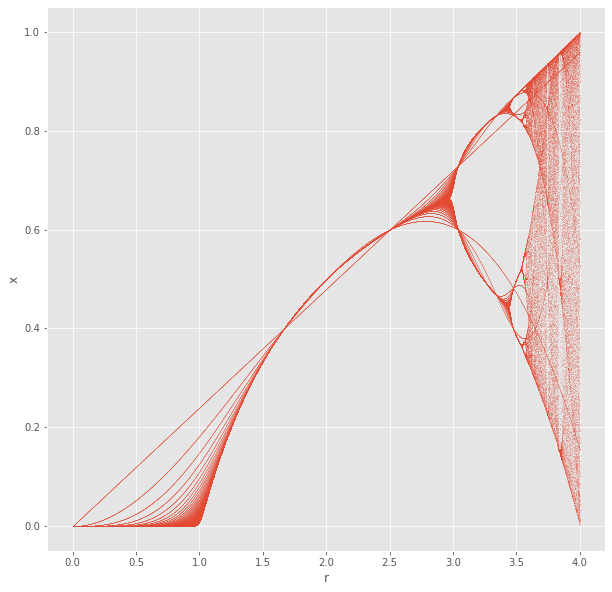

In [3]:
r_list = np.linspace(0.0, 4.0, 5000)

r_plot = []
x_list = []
x0 = random.uniform(0.0, 1.0)
x_ = x0

for r in r_list:
    x0 = x_
    for _ in range(100):
        x0 = logistic_map(r, x0)
        r_plot.append(r)
        x_list.append(x0)

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(1, 1, 1)
ax0.set_xlabel("r")
ax0.set_ylabel("x")
_ = ax0.scatter(r_plot, x_list, s=0.01)

In [13]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

In [14]:
def lorenz_attractor(state, _):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

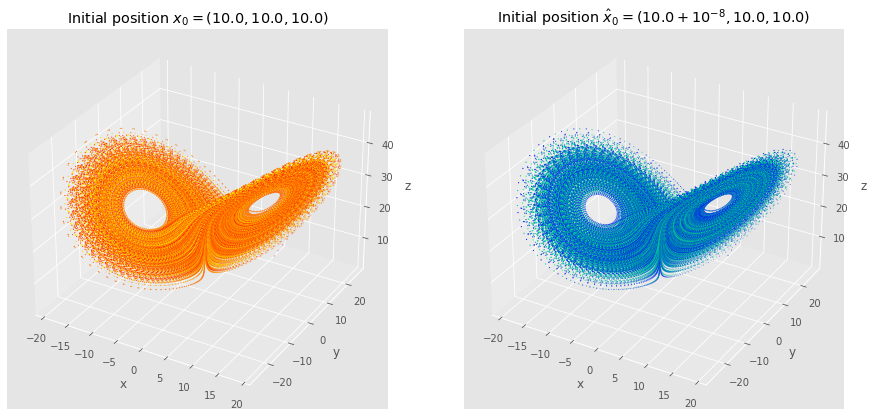

In [22]:
state0 = [10.0, 10.0, 10.0]
state0_ = [10.0 + 10**(-8), 10.0, 10.0]
t_end = 1000.0
t = np.linspace(0.0, t_end, 100000)

states = scipy.integrate.odeint(lorenz_attractor, state0, t)
states_ = scipy.integrate.odeint(lorenz_attractor, state0_, t)

states_diff = np.sum(np.power(states - states_, 2), axis=1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax_ = fig.add_subplot(1, 2, 2, projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax_.set_xlabel("x")
ax_.set_ylabel("y")
ax_.set_zlabel("z")
ax.scatter(states[:, 0], states[:, 1], states[:, 2], c=t, cmap="autumn", s=0.5)
ax_.scatter(states_[:, 0], states_[:, 1], states_[:, 2], c=t, cmap="winter", s=0.5)
ax.set_title(r"Initial position $x_0 = (10.0, 10.0, 10.0)$")
_ = ax_.set_title(r"Initial position $\hat{x}_0 = (10.0 + 10^{-8}, 10.0, 10.0)$")

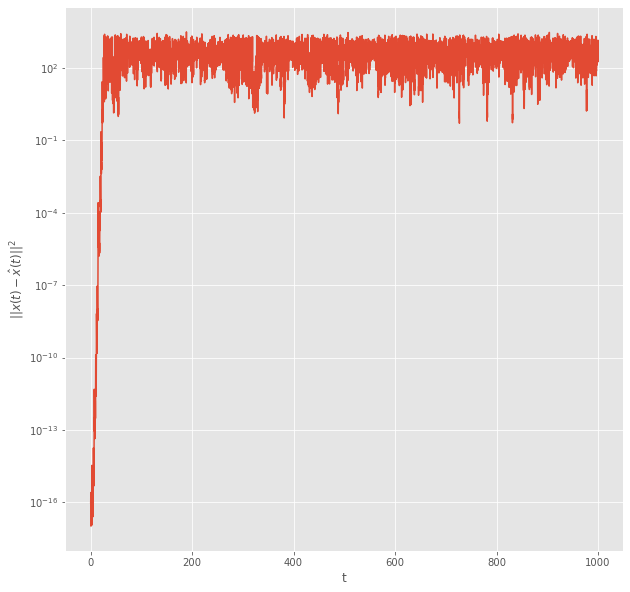

In [25]:
fig_ = plt.figure(figsize=(10, 10))
ax_ = fig_.add_subplot(1, 1, 1)
ax_.set_xlabel("t")
ax_.set_ylabel(r"$\|\|x(t) - \hat{x}(t)\|\|^{2}$")
ax_.set_yscale("log")
_ = ax_.plot(t, states_diff)

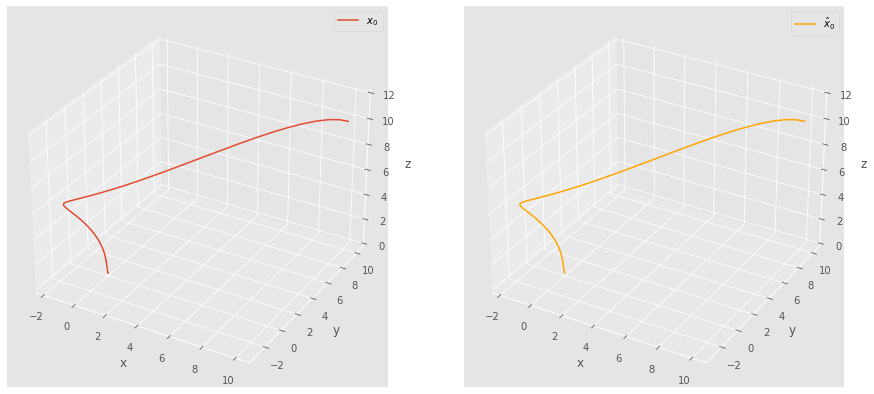

In [11]:
rho = 0.5

state0 = [10.0, 10.0, 10.0]
state0_ = [10.0 + 10**(-8), 10.0, 10.0]
t_end = 1000.0
t = np.linspace(0.0, t_end, 100000)

states = scipy.integrate.odeint(lorenz_attractor, state0, t)
states_ = scipy.integrate.odeint(lorenz_attractor, state0_, t)

states_diff = np.sum(np.power(states - states_, 2), axis=1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax_ = fig.add_subplot(1, 2, 2, projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax_.set_xlabel("x")
ax_.set_ylabel("y")
ax_.set_zlabel("z")
ax.plot(states[:, 0], states[:, 1], states[:, 2], label=r"$x_0$")
ax_.plot(states_[:, 0], states_[:, 1], states_[:, 2], label=r"$\hat{x}_0$", color="orange")
ax.legend()
_ = ax_.legend()